In [1]:
import  pandas as pd
df=pd.read_csv('Churn_Modelling.csv')

In [2]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


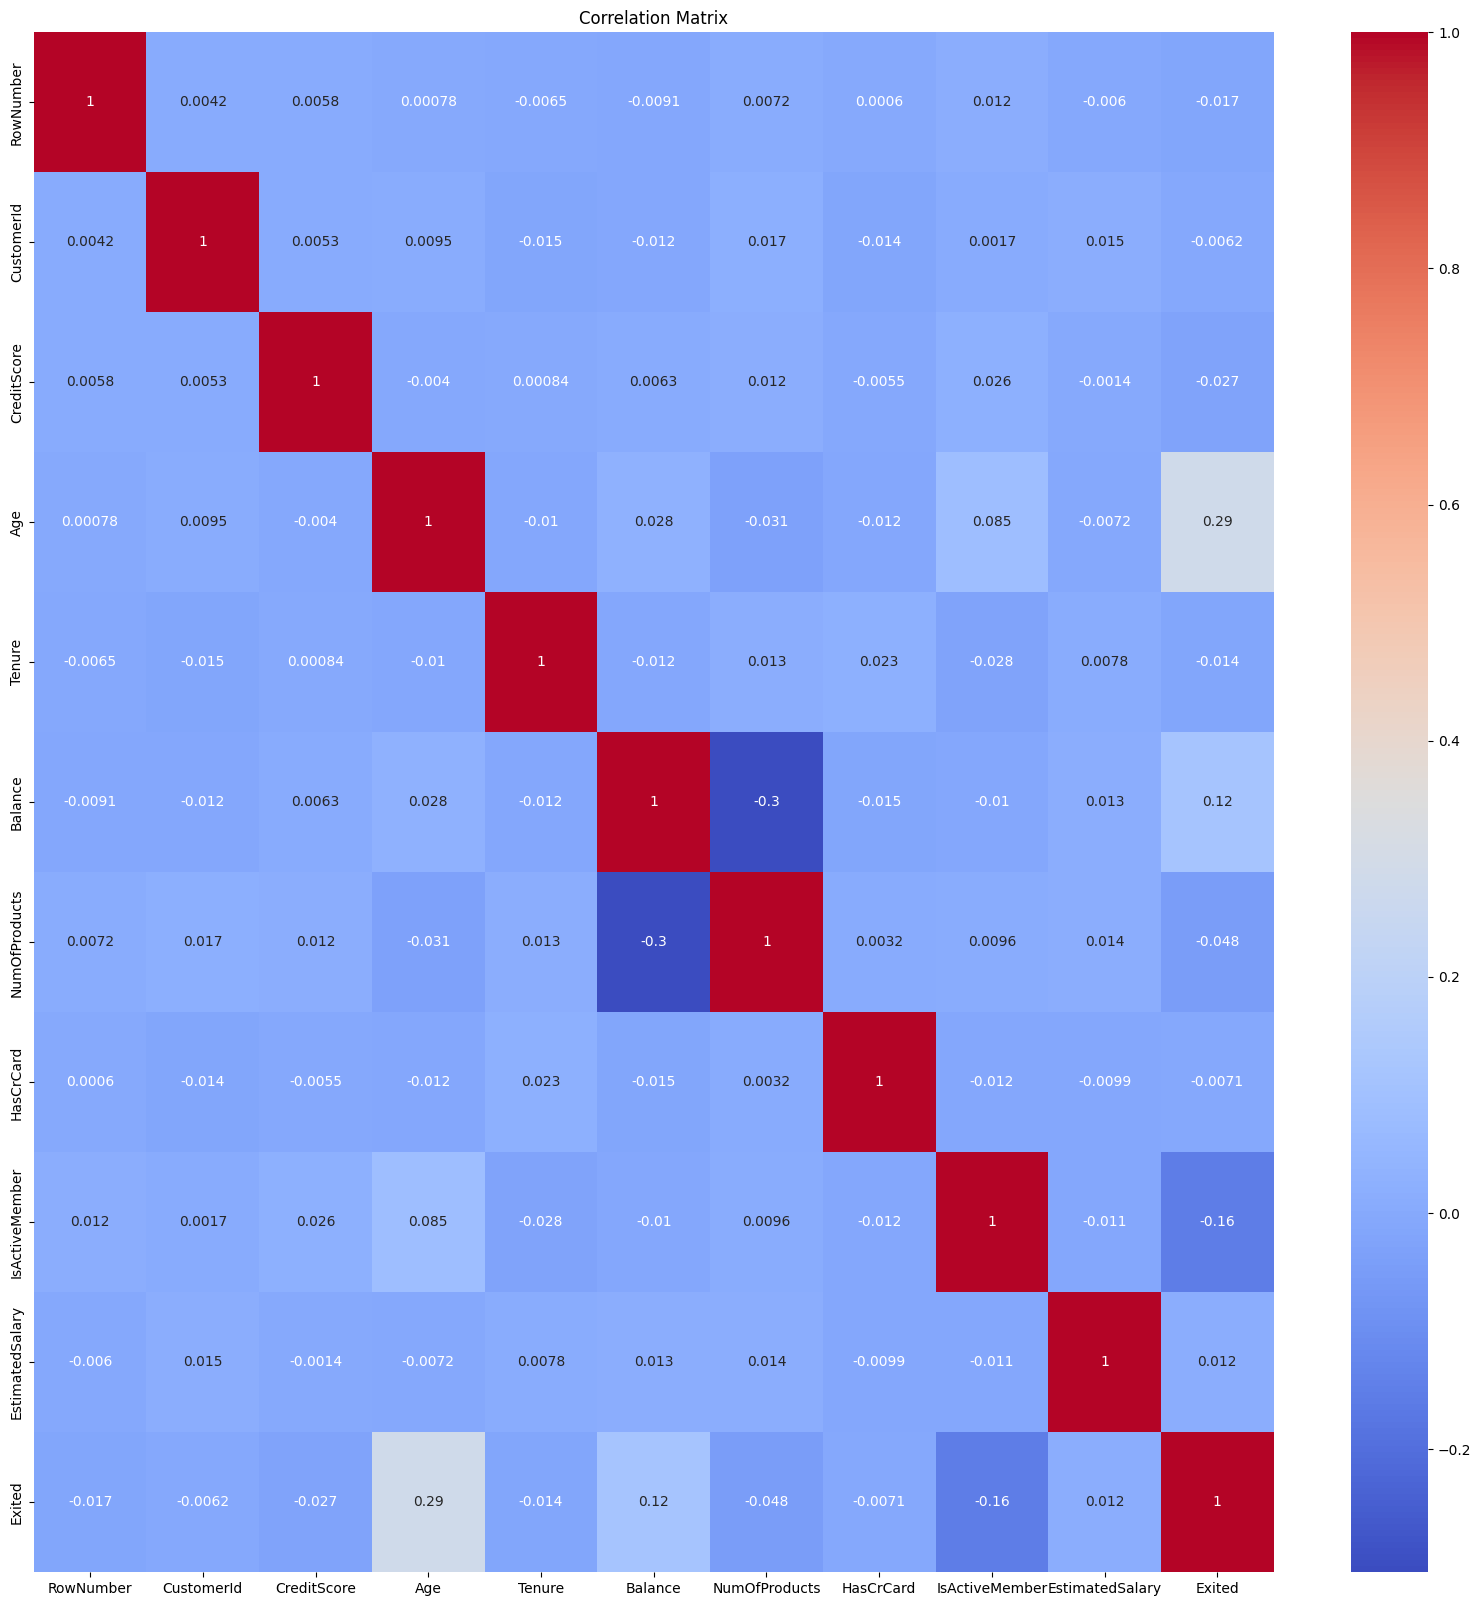

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Keep only numeric columns
corrmat = df.select_dtypes(include='number').corr()

# Sort correlation matrix (optional)
top_corr_features = corrmat.index

# Plot heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corrmat, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [7]:
#Get the Independent and Dependent Features
X=df.iloc[:,3:13]
Y=df.iloc[:,13]

In [8]:
geography=pd.get_dummies(X['Geography'],drop_first=True)

In [12]:
geography.head()

,Germany,Spain
0,False,False
1,False,True
2,False,False
3,False,False
4,False,True


In [13]:
geography=geography.astype(int)

In [15]:
geography.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [17]:
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [18]:
gender=gender.astype(int)

In [20]:
gender.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [21]:
## Drop Categorical Features
X=X.drop(['Geography','Gender'],axis=1)

In [22]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [23]:
X=pd.concat([X,geography,gender],axis=1)

In [24]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [27]:
params={
    "learning_rate" :[0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth":[3,4,6,8,10,12,15],
    "min_child_weight":[0.0,0.1,0.2,0.3,0.6],
    "colsample_bytree":[0.3,0.4,0.5,0.7]
}

In [28]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [29]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [30]:
classifier=xgboost.XGBClassifier()

In [31]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [32]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,Y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits

 Time taken: 0 hours 0 minutes and 5.93 seconds.


In [33]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [34]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=0.6, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [35]:
random_search.best_params_

{'min_child_weight': 0.6,
 'max_depth': 4,
 'learning_rate': 0.2,
 'colsample_bytree': 0.7}

In [36]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0.4, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=7, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [38]:
print(X.isnull().sum())  # For pandas DataFrame


CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Germany            0
Spain              0
Male               0
dtype: int64


In [40]:
# Option 1: Simple imputation
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # or 'most_frequent', 'median'
X = imputer.fit_transform(X)

In [42]:
from xgboost import XGBClassifier

classifier = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')  # No 'silent'


In [46]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

# Pipeline to handle missing values and scaling
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('classifier', XGBClassifier(eval_metric='mlogloss'))
])

# Cross-validation
scores = cross_val_score(pipeline, X, Y, cv=10)
print("Cross-validated accuracy scores:", scores)
print("Mean accuracy:", scores.mean())



Cross-validated accuracy scores: [0.857 0.851 0.853 0.854 0.848 0.857 0.847 0.871 0.848 0.844]
Mean accuracy: 0.853
